mutant
100      {u'params': [0.0115137451754, -0.139161145305]...
101      {u'params': [-0.0516755889659, 2.42241850668],...
104      {u'params': [0.0046016219081, 0.411551761193],...
106      {u'params': [-0.048471189104, 2.21465243524], ...
113                        {u'params': None, u'cov': None}
114      {u'params': [-0.0129056676352, 0.583436599074]...
116      {u'params': [0.015028672021, -0.392276007379],...
117      {u'params': [-0.0614182470479, 2.89573435227],...
119      {u'params': [-0.0622823337592, 2.9392555768], ...
121      {u'params': [-0.0609343426881, 2.89527365159],...
122      {u'params': [-0.0558852435778, 2.73572001923],...
124      {u'params': [0.00672738420236, 0.0538465212293...
38       {u'params': [0.0183437535399, -0.118605200574]...
41       {u'params': [-0.0613373235034, 2.90630864062],...
42       {u'params': [-0.0617690133078, 2.94672315577],...
43       {u'params': [-0.0542889271076, 2.54765937715],...
96       {u'params': [-0.055631031458, 2.63874088

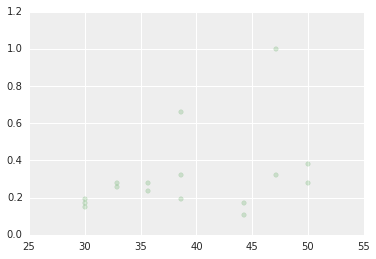

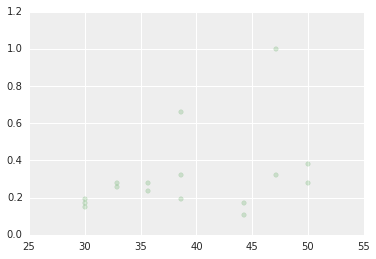

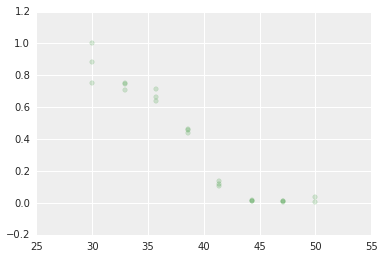

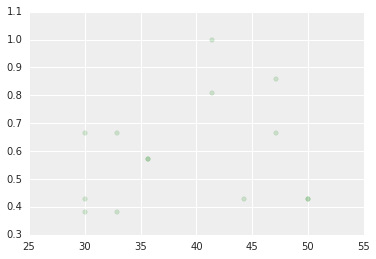

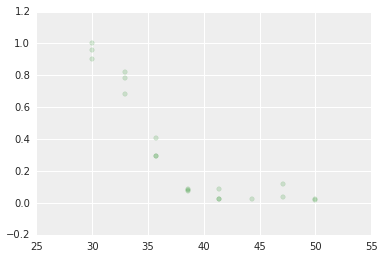

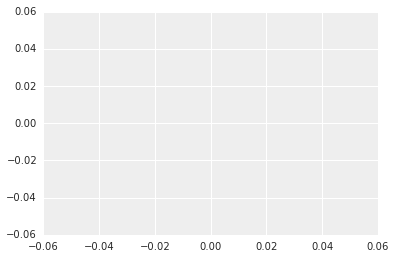

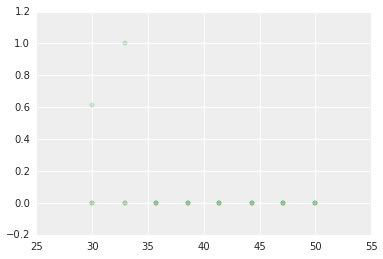

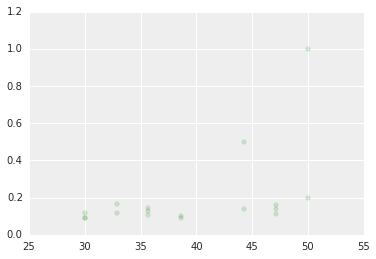

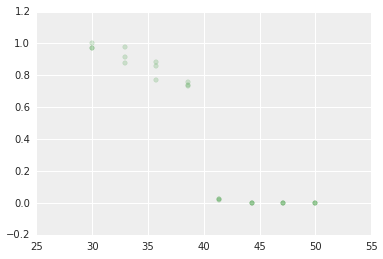

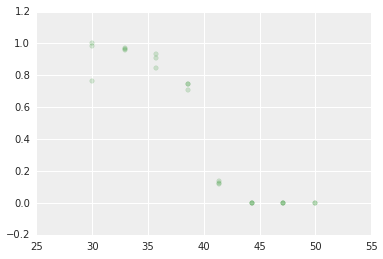

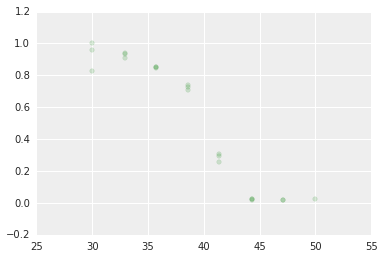

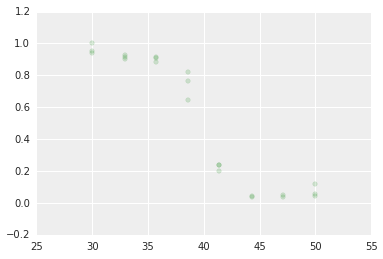

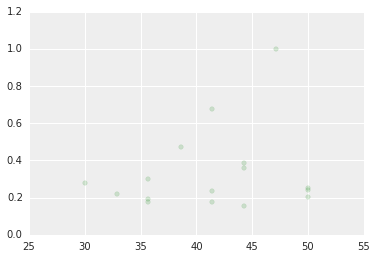

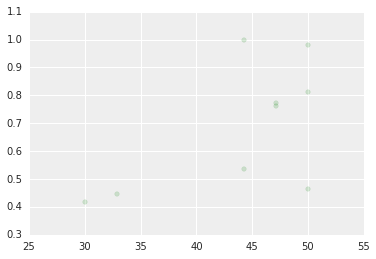

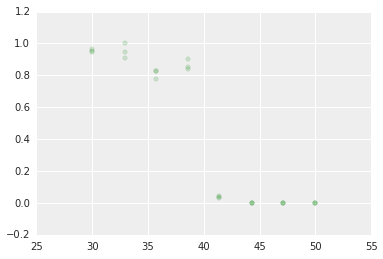

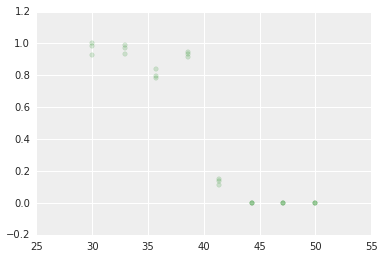

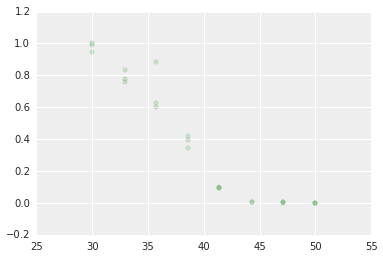

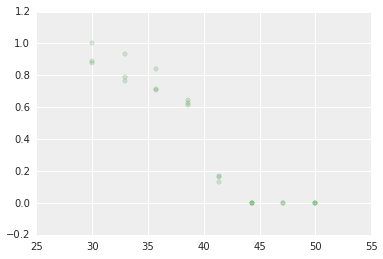

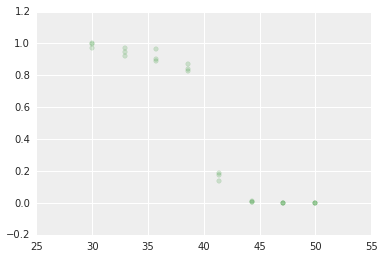

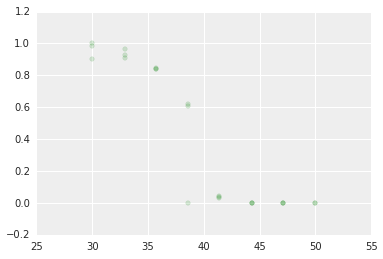

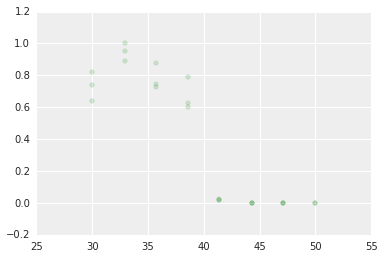

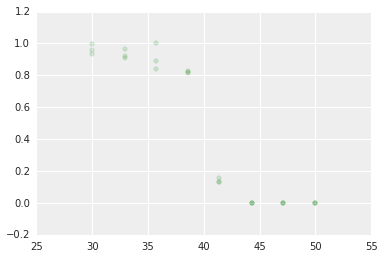

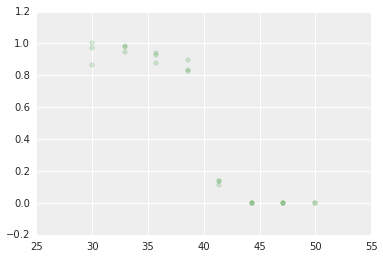

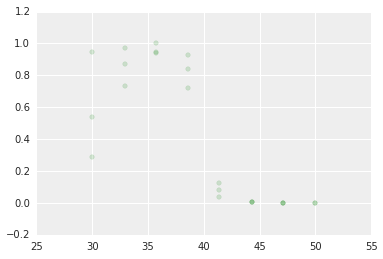

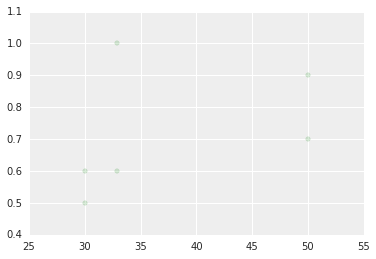

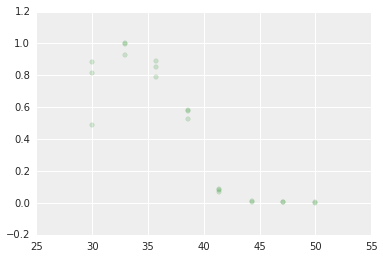

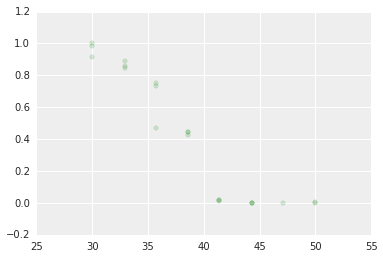

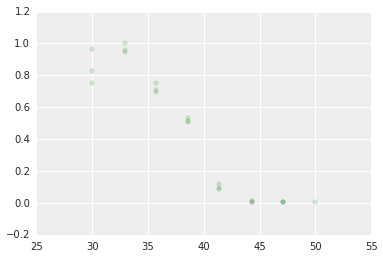

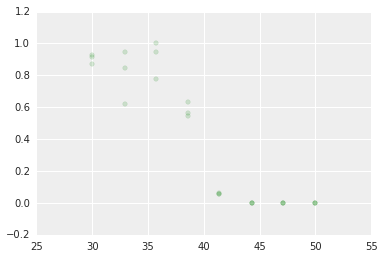

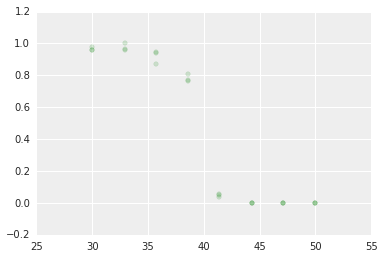

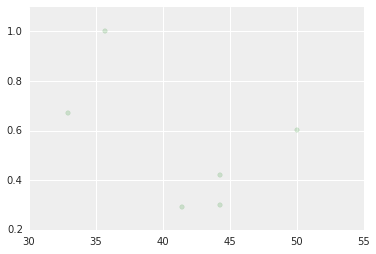

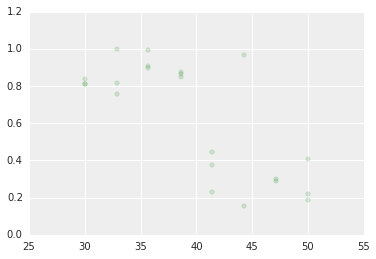

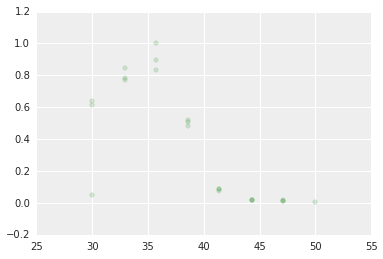

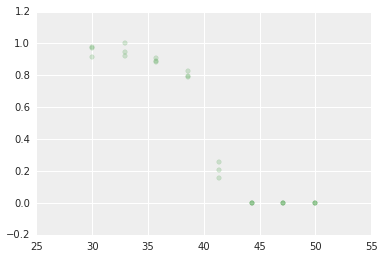

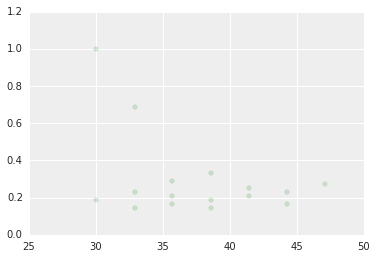

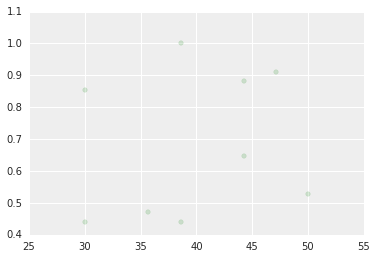

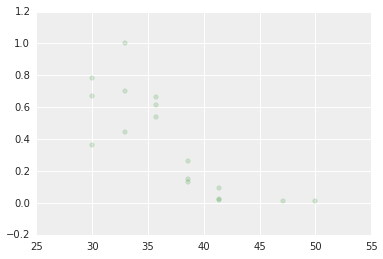

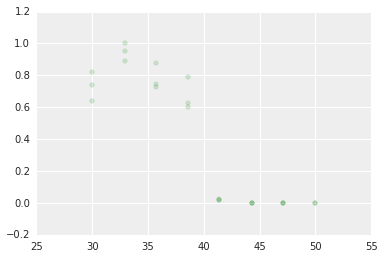

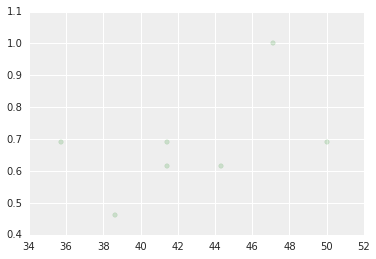

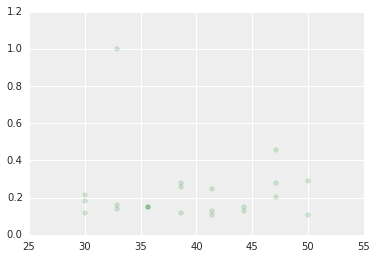

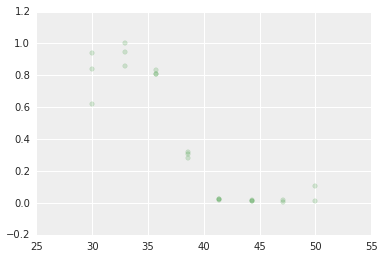

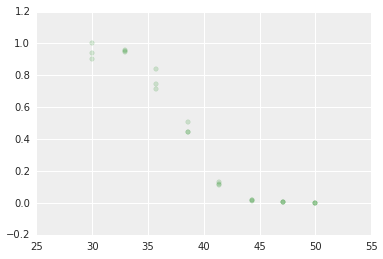

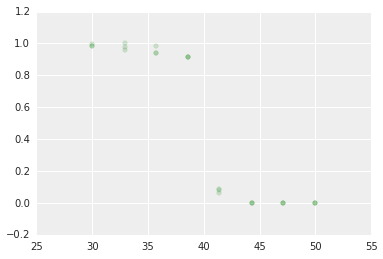

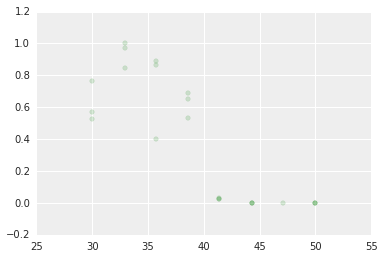

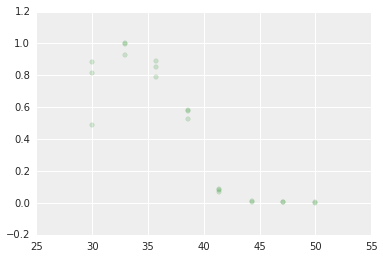

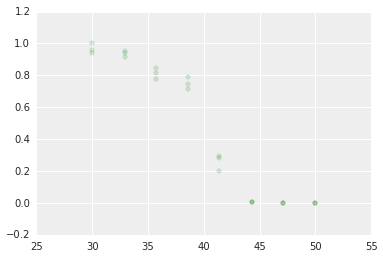

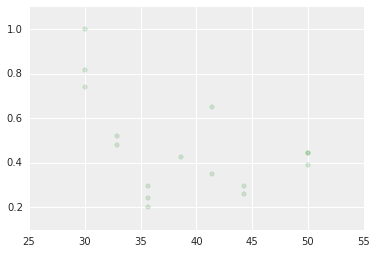

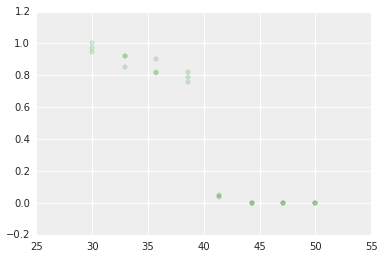

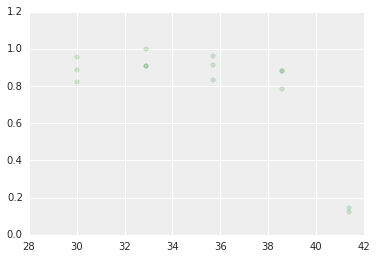

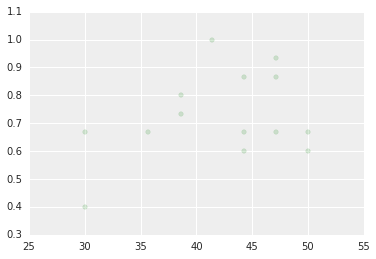

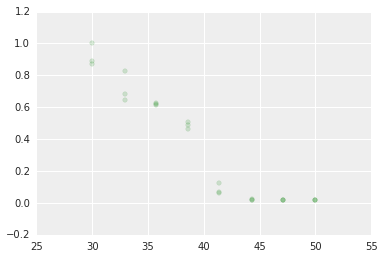

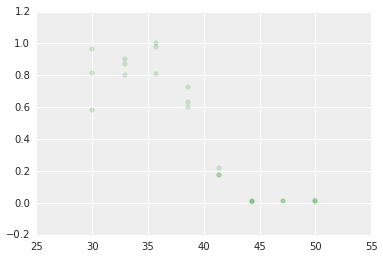

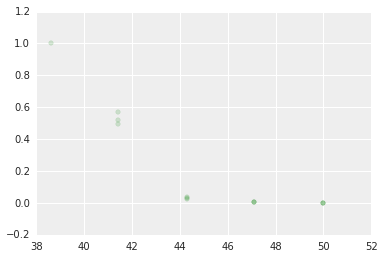

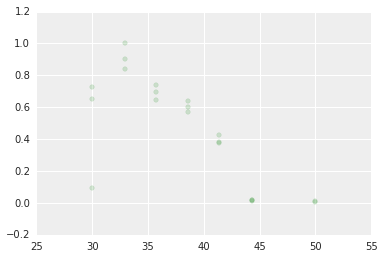

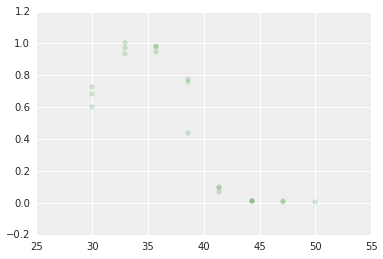

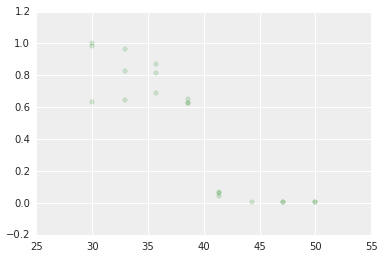

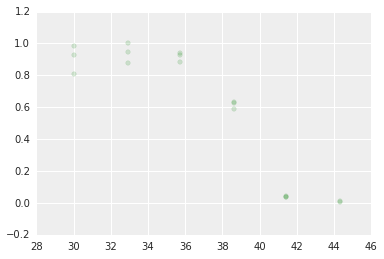

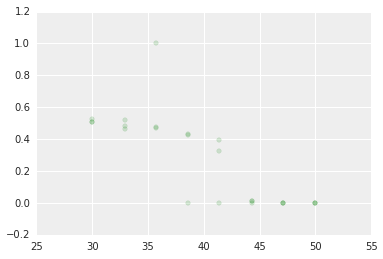

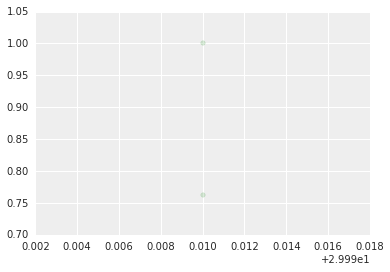

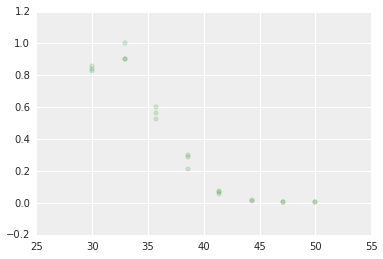

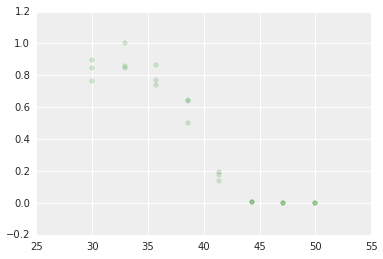

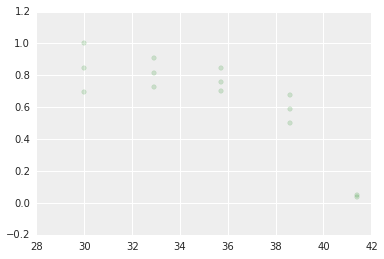

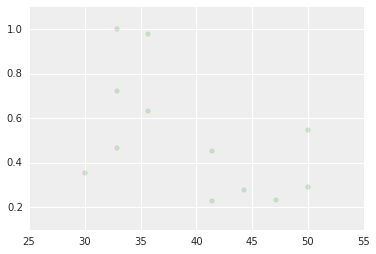

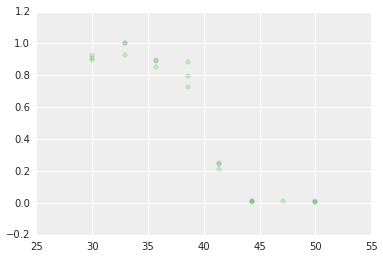

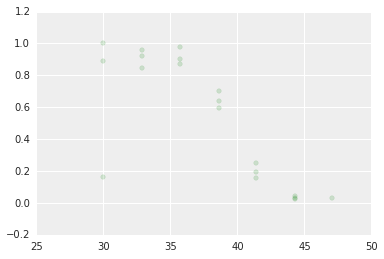

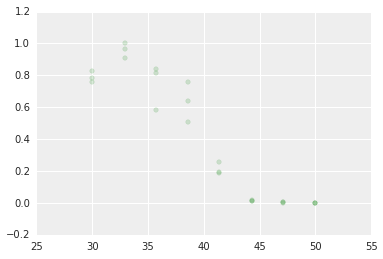

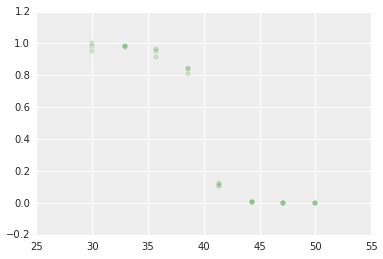

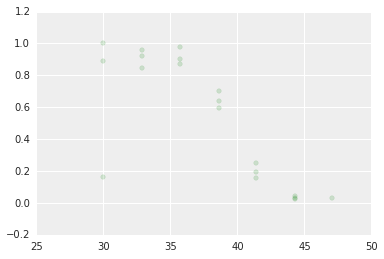

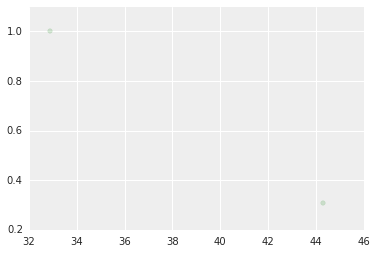

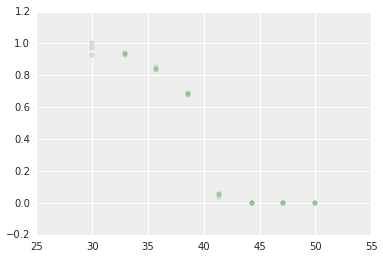

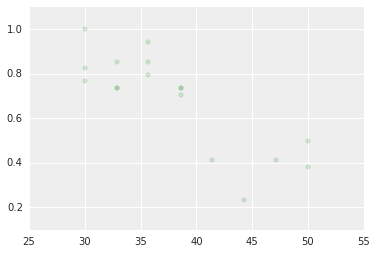

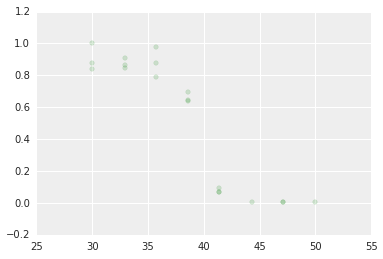

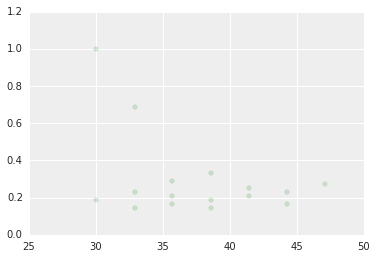

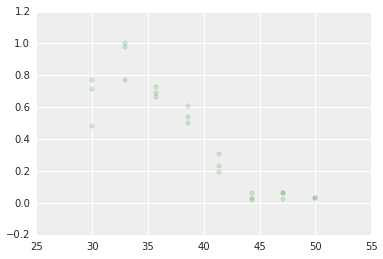

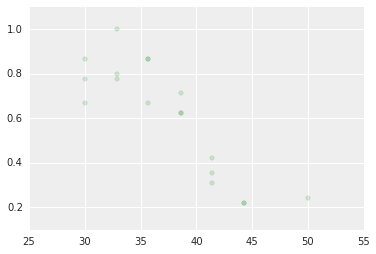

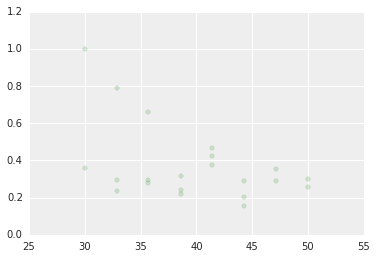

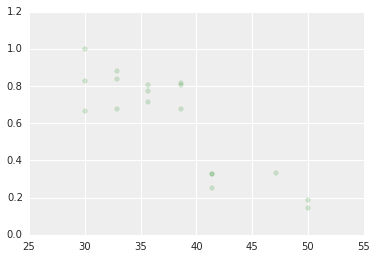

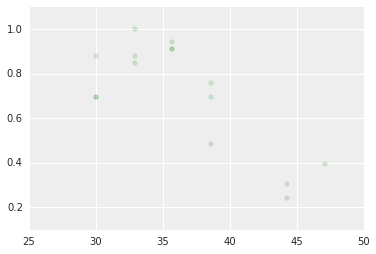

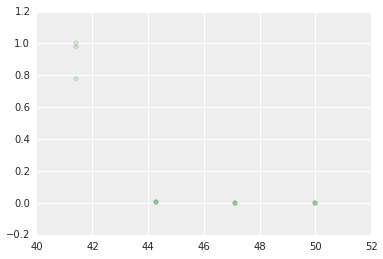

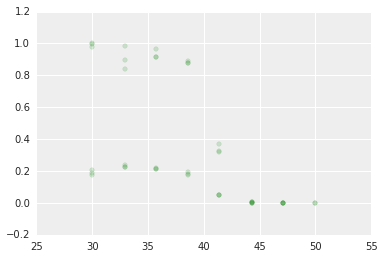

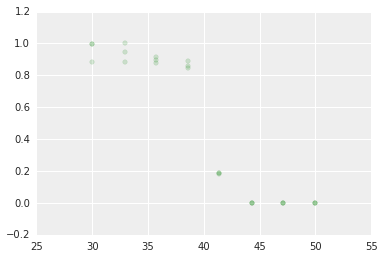

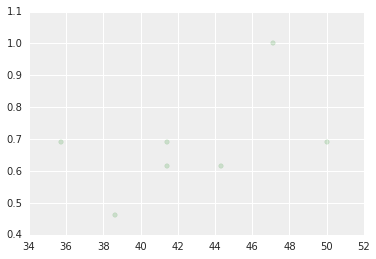

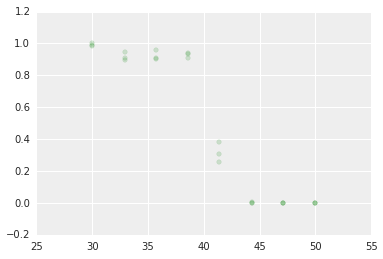

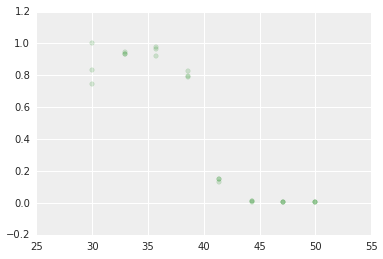

In [58]:
import pandas 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit 
%matplotlib inline
plt.style.use('bmh')

data = pandas.read_csv( '/Users/alex/Documents/bagel-thermostability/data-clean.csv' )
data = data[( data.rate >= 0 )]

mutants = data.groupby( 'mutant' )

def main( df ):
    '''Main function in the routine'''
    
    df.rate = df.rate / df.rate.max()
    fig, ax = plt.subplots()
    ax.scatter( df.temp, df.rate, color='g', alpha=0.15 )
    
    try:
        params, cov = curve_fit( lambda x, m, b: x * m + b, df.temp, df.rate )
        return { 'params': params, 'cov': cov }
    except: 
        return { 'params': None, 'cov': None }
    
    plt.title( df.mutant )
    plt.xlabel( 'degrees C' )
    plt.yticks( [ 0.2, 0.4, 0.6, 0.8, 1 ] )
    plt.xticks( range( 30, 51, 5 ) )
    plt.ylabel( 'per minute' )
    plt.show()
    
    return { 'params': params, 'cov': cov }

mutants.apply( main )

